In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [20]:
# Load the dataset
df = pd.read_csv("./data/cars_hw.csv")

In [21]:
# Get the number of observations (rows) and features (columns)
num_observations, num_features = df.shape
# Display the column names (available variables)
available_variables = df.columns.tolist()
# Display the first few rows
df_head = df.head()

In [22]:
# Print results
print(f"Number of observations: {num_observations}")
print(f"Number of features: {num_features}\n")

print("Available variables:")
for var in available_variables:
    print(f"- {var}")

print("\nFirst few rows of data:")
print(df_head)

Number of observations: 976
Number of features: 12

Available variables:
- Unnamed: 0
- Make
- Make_Year
- Color
- Body_Type
- Mileage_Run
- No_of_Owners
- Seating_Capacity
- Fuel_Type
- Transmission
- Transmission_Type
- Price

First few rows of data:
   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3     

In [23]:
# Define categorical and numeric variables
categorical_vars = ["Make", "Color", "Body_Type", "No_of_Owners", "Fuel_Type", "Transmission", "Transmission_Type"]
numeric_vars = ["Mileage_Run", "Make_Year", "Seating_Capacity"]
target_var = "Price"

In [24]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

In [25]:
# Select features and target variable
X = df_encoded[numeric_vars + [col for col in df_encoded.columns if col.startswith(tuple(categorical_vars))]]
y = df_encoded[target_var]

In [26]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Iterate over min_samples_leaf values from 1 to 25
r2_scores = {}
for min_samples in range(1, 26):
    model = DecisionTreeRegressor(min_samples_leaf=min_samples, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores[min_samples] = r2

# Find the best min_samples_leaf value
best_min_samples = max(r2_scores, key=r2_scores.get)
best_r2 = r2_scores[best_min_samples]

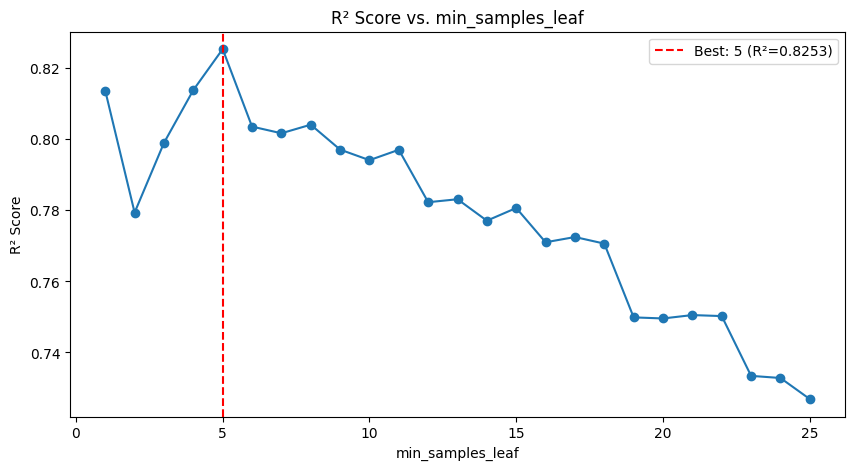

In [28]:
# Plot R² scores
plt.figure(figsize=(10, 5))
plt.plot(list(r2_scores.keys()), list(r2_scores.values()), marker="o", linestyle="-")
plt.xlabel("min_samples_leaf")
plt.ylabel("R² Score")
plt.title("R² Score vs. min_samples_leaf")
plt.axvline(best_min_samples, color='r', linestyle='--', label=f"Best: {best_min_samples} (R²={best_r2:.4f})")
plt.legend()
plt.show()

In [29]:
# Train the best model
best_model = DecisionTreeRegressor(min_samples_leaf=best_min_samples, random_state=42)
best_model.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=5, random_state=42)

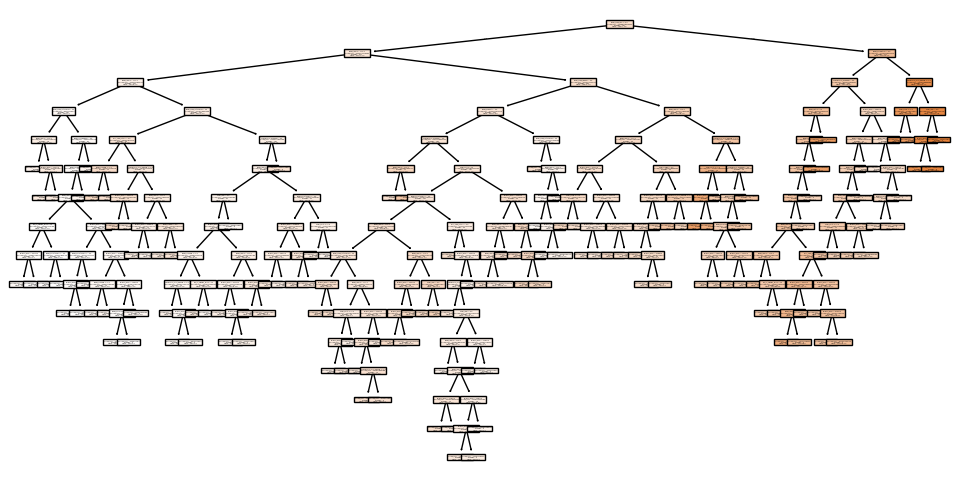

In [30]:
# Plot the decision tree
plt.figure(figsize=(12, 6))
plot_tree(best_model, filled=True, feature_names=X.columns)
plt.show()

In [31]:
# Print the best min_samples_leaf and corresponding R² score
print(f"Best min_samples_leaf: {best_min_samples}")
print(f"Highest R² on test data: {best_r2:.4f}")

Best min_samples_leaf: 5
Highest R² on test data: 0.8253


In [35]:
# Make predictions
y_pred = best_model.predict(X_test)

In [36]:
# Compute R² and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


In [37]:
# Print metrics
print(f"R² on test data: {r2:.4f}")
print(f"RMSE on test data: {rmse:.4f}")

R² on test data: 0.8253
RMSE on test data: 141536.5410


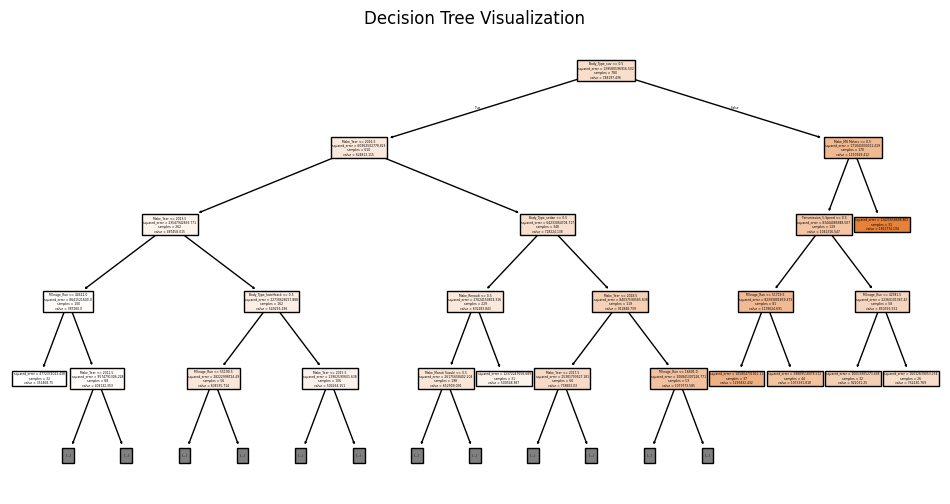

In [38]:
# Plot the decision tree (dendrogram)
plt.figure(figsize=(12, 6))
plot_tree(model, filled=True, feature_names=X.columns, max_depth=4)  # Limit depth for clarity
plt.title("Decision Tree Visualization")
plt.show()

In [39]:
# Compute residuals
residuals = y_test - y_pred

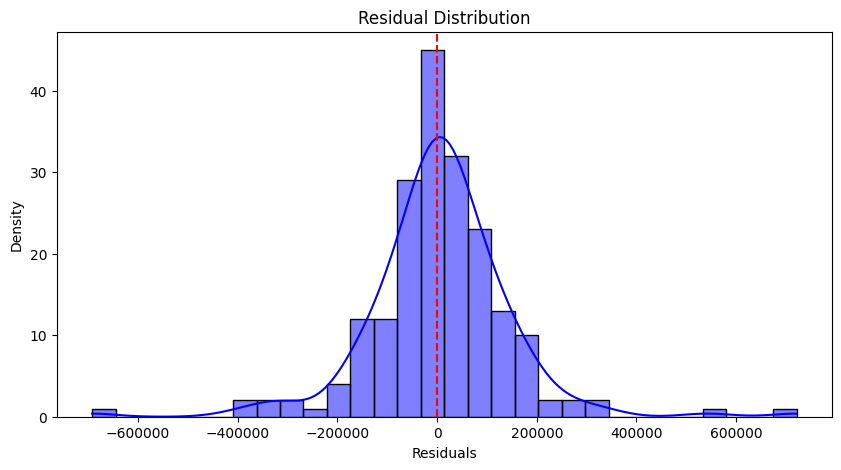

In [42]:
# Plot residuals
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, bins=30, color="blue")
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Residual Distribution")
plt.show()

In [43]:
# Check if residuals are symmetric and centered around 0
mean_residual = np.mean(residuals)
print(f"Mean of residuals: {mean_residual:.4f}")

Mean of residuals: 5605.5313


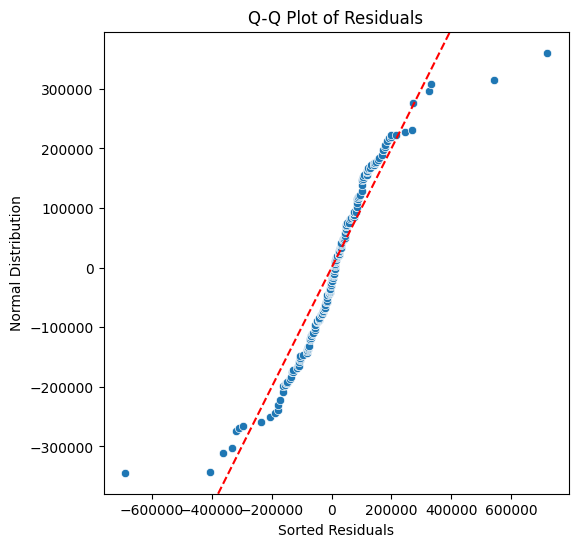

In [44]:
# Q-Q plot for normality check
plt.figure(figsize=(6, 6))
sns.scatterplot(x=np.sort(residuals), y=np.sort(np.random.normal(0, np.std(residuals), len(residuals))))
plt.xlabel("Sorted Residuals")
plt.ylabel("Normal Distribution")
plt.title("Q-Q Plot of Residuals")
plt.axline((0, 0), slope=1, color="red", linestyle="--")
plt.show()

The density of the residuals is approximately symmetric and centered around 0.

In [45]:
from sklearn.linear_model import LinearRegression

# Train a Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lin_reg.predict(X_test)

# Compute R² and RMSE for Linear Regression
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# Compare with Decision Tree results
print(f"Linear Regression R²: {r2_lr:.4f}")
print(f"Linear Regression RMSE: {rmse_lr:.4f}")
print(f"Decision Tree R²: {r2:.4f}")  # From previous tree model
print(f"Decision Tree RMSE: {rmse:.4f}")

# Determine the better model
if r2_lr > r2:
    print("Linear Regression performs better on the test set.")
else:
    print("Decision Tree Regression performs better on the test set.")

Linear Regression R²: 0.8203
Linear Regression RMSE: 143575.1966
Decision Tree R²: 0.8253
Decision Tree RMSE: 141536.5410
Decision Tree Regression performs better on the test set.


Decision Tree Regression performs better because it can capture nonlinear relationships and interactions between variables and it handles categorical variables better after one-hot encoding.



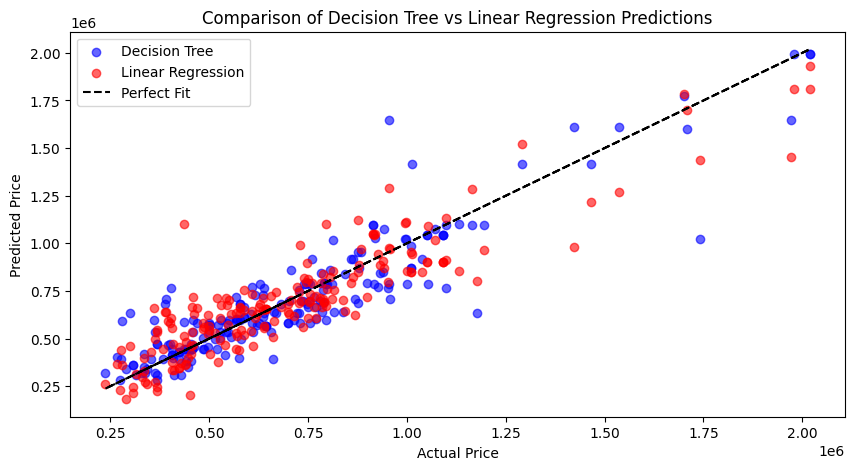

In [46]:
# Predict prices using Decision Tree and Linear Regression
y_pred_tree = best_model.predict(X_test)  # Decision Tree predictions
y_pred_lr = lin_reg.predict(X_test)  # Linear Regression predictions

# Scatter plot comparing predictions to actual prices
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_tree, label="Decision Tree", alpha=0.6, color="blue")
plt.scatter(y_test, y_pred_lr, label="Linear Regression", alpha=0.6, color="red")
plt.plot(y_test, y_test, "k--", label="Perfect Fit")  # Diagonal reference line

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Comparison of Decision Tree vs Linear Regression Predictions")
plt.legend()
plt.show()

While statistically, the decision tree model worked better, we can see that both the linear regression and decision tree models had relatively the same accuracy from the graph. 